#*Dimension Reduction Using PCA*

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import dataset
from google.colab import files 


uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['Wine_P.csv'])) 
print(data)

Saving Wine_P.csv to Wine_P.csv
     Alcohol  Malic_Acid   Ash  ...  OD280  Proline  Customer_Segment
0      14.23        1.71  2.43  ...   3.92     1065                 1
1      13.20        1.78  2.14  ...   3.40     1050                 1
2      13.16        2.36  2.67  ...   3.17     1185                 1
3      14.37        1.95  2.50  ...   3.45     1480                 1
4      13.24        2.59  2.87  ...   2.93      735                 1
..       ...         ...   ...  ...    ...      ...               ...
173    13.71        5.65  2.45  ...   1.74      740                 3
174    13.40        3.91  2.48  ...   1.56      750                 3
175    13.27        4.28  2.26  ...   1.56      835                 3
176    13.17        2.59  2.37  ...   1.62      840                 3
177    14.13        4.10  2.74  ...   1.60      560                 3

[178 rows x 14 columns]


In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
#shape of dataset
data.shape

(178, 14)

In [ ]:
#Extraction of independent variable
X = data.iloc[:,0:13].values
X.shape

(178, 13)

In [ ]:
#Extraction of dependent variable
Y = data.iloc[:,13].values
Y.shape

(178,)

In [ ]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 30)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Original Dimensions of data
X_train.shape

(142, 13)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train

array([[-1.45705693e+00,  1.33941180e+00],
       [-3.90274552e+00, -2.30252389e-01],
       [ 1.53401586e+00,  1.61589358e+00],
       [ 3.13861604e+00, -6.66329641e-01],
       [ 1.57674053e-01,  2.38594454e+00],
       [ 3.07953857e+00, -2.05593465e+00],
       [ 2.54824809e+00, -8.78370348e-01],
       [-2.67722104e+00, -2.18259194e+00],
       [ 7.75701381e-01,  2.35731489e+00],
       [ 3.08128890e+00, -1.07711980e+00],
       [ 2.18310356e+00, -1.18364614e+00],
       [ 2.51291331e+00, -8.56641788e-01],
       [ 1.38090936e+00,  2.32753572e+00],
       [-2.25879946e+00, -4.62915029e-01],
       [-1.25432233e+00,  8.80716156e-01],
       [ 1.50747118e+00,  7.28139195e-01],
       [-2.82464783e+00, -1.95714955e+00],
       [-7.68710798e-01,  1.07800675e+00],
       [-3.82651328e-01,  2.18482401e+00],
       [-5.51521733e-01,  2.39241255e+00],
       [-2.61019086e+00, -2.81948024e+00],
       [-1.68280599e+00,  1.35621038e+00],
       [ 5.78332549e-02,  2.40420212e+00],
       [-6.

In [ ]:
#New Dimensions after applying PCA
X_train.shape

(142, 2)

In [ ]:
#fitting SVM to training set
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predicting the test set results
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2])

In [ ]:
#Making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[11,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  9]])

Text(24.0, 0.5, 'Predicted label')

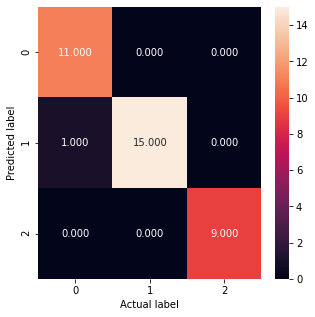

In [ ]:
#heatmap
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm, fmt=".3f", annot=True)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,Y_pred)*100
acc

97.22222222222221

In [ ]:
#complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


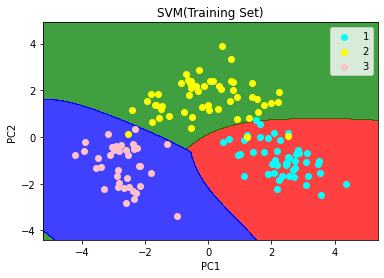

In [ ]:
#Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()- 1, stop = X_set[:, 0].max()+ 1 , step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
              c = ListedColormap(('cyan','yellow','pink'))(i), label = j)
plt.title('SVM(Training Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


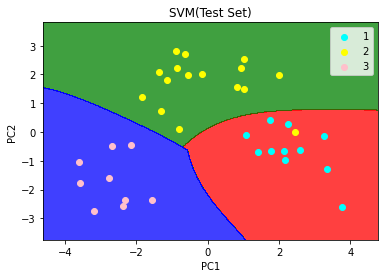

In [ ]:
#Visualising the test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()- 1, stop = X_set[:, 0].max()+ 1 , step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
              c = ListedColormap(('cyan','yellow','pink'))(i), label = j)
plt.title('SVM(Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()